## Import required packages

In [1]:
# Import scraping modules
from urllib.request import urlopen
from bs4 import BeautifulSoup

# Import data manipulation modules
import pandas as pd
import numpy as np

# Import data visualization modules
import matplotlib as mpl
import matplotlib.pyplot as plt

## Open URL with BeautifulSoup

In [2]:
# URL of page
url = 'https://www.pro-football-reference.com/years/2019/passing.htm'

# Open URL and pass to BeautifulSoup
html = urlopen(url)
stats_page = BeautifulSoup(html)

## Create array of column names

In [3]:
# Collect table headers
column_headers = stats_page.findAll('tr')[0]
column_headers = [i.getText() for i in column_headers.findAll('th')]

## Extract the data from the website

In [4]:
# Collect table rows
rows = stats_page.findAll('tr')[1:]

# Get stats from each row
qb_stats = []
for i in range(len(rows)):
    qb_stats.append([col.getText() for col in rows[i].findAll('td')])

## Turn scraped data into a `pandas` DataFrame

In [5]:
# Create DataFrame from our scraped data
data = pd.DataFrame(qb_stats, columns=column_headers[1:])

## Examine first few rows of our DataFrame

In [6]:
# Examine first five rows of data
data.head()

,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,...,Y/G,Rate,QBR,Sk,Yds,NY/A,ANY/A,Sk%,4QC,GWD
0,Jared Goff,LAR,25,QB,16,16,9-7-0,394,626,62.9,...,289.9,86.5,,22,170,6.90,6.46,3.4,1,2
1,Jameis Winston,TAM,25,QB,16,16,7-9-0,380,626,60.7,...,319.3,84.3,,47,282,7.17,6.15,7.0,2,2
2,Matt Ryan,ATL,34,QB,15,15,7-8-0,408,616,66.2,...,297.7,92.1,,48,316,6.25,6.08,7.2,3,2
3,Tom Brady,NWE,42,QB,16,16,12-4-0,373,613,60.8,...,253.6,88.0,,27,185,6.05,6.24,4.2,1,1
4,Carson Wentz,PHI,27,QB,16,16,9-7-0,388,607,63.9,...,252.4,93.1,,37,230,5.91,6.26,5.7,2,4


In [7]:
# View columns in data
data.columns

Index(['Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C',
       'Y/G', 'Rate', 'QBR', 'Sk', 'Yds', 'NY/A', 'ANY/A', 'Sk%', '4QC',
       'GWD'],
      dtype='object')

## Make a new column called `Yds_Sack` to differentiate from passing yards

In [8]:
# Rename sack yards column to `Yds_Sack`
new_columns = data.columns.values
new_columns[-6] = 'Yds_Sack'
data.columns = new_columns

## Examine the new columns of our DataFrame

In [9]:
# View columns in data
data.columns

Index(['Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C',
       'Y/G', 'Rate', 'QBR', 'Sk', 'Yds_Sack', 'NY/A', 'ANY/A', 'Sk%', '4QC',
       'GWD'],
      dtype='object')

## Stat categories we are going to plot

In [10]:
# Select stat categories
categories = ['Cmp%', 'Yds', 'TD', 'Int', 'Y/A', 'Rate']

In [11]:
# Create data subset for radar chart
data_radar = data[['Player', 'Tm'] + categories]
data_radar.head()

,Player,Tm,Cmp%,Yds,TD,Int,Y/A,Rate
0,Jared Goff,LAR,62.9,4638,22,16,7.4,86.5
1,Jameis Winston,TAM,60.7,5109,33,30,8.2,84.3
2,Matt Ryan,ATL,66.2,4466,26,14,7.3,92.1
3,Tom Brady,NWE,60.8,4057,24,8,6.6,88.0
4,Carson Wentz,PHI,63.9,4039,27,7,6.7,93.1


## Examine data types in our DataFrame

In [12]:
# Check data types
data_radar.dtypes

Player    object
Tm        object
Cmp%      object
Yds       object
TD        object
Int       object
Y/A       object
Rate      object
dtype: object

## Convert the columns we are going to plot from objects to numerical data

In [13]:
# Convert data to numerical values
for i in categories:
    data_radar[i] = pd.to_numeric(data[i])

## Examine the data types after conversion to numerical values

In [14]:
# Check data types
data_radar.dtypes

Player     object
Tm         object
Cmp%      float64
Yds       float64
TD        float64
Int       float64
Y/A       float64
Rate      float64
dtype: object

## Remove characters for end-of-season achievements

In [15]:
# Remove ornamental characters for achievements
data_radar['Player'] = data_radar['Player'].str.replace('*', '')
data_radar['Player'] = data_radar['Player'].str.replace('+', '')

In [16]:
data_radar.head(32)

,Player,Tm,Cmp%,Yds,TD,Int,Y/A,Rate
0,Jared Goff,LAR,62.9,4638.0,22.0,16.0,7.4,86.5
1,Jameis Winston,TAM,60.7,5109.0,33.0,30.0,8.2,84.3
2,Matt Ryan,ATL,66.2,4466.0,26.0,14.0,7.3,92.1
3,Tom Brady,NWE,60.8,4057.0,24.0,8.0,6.6,88.0
4,Carson Wentz,PHI,63.9,4039.0,27.0,7.0,6.7,93.1
5,Dak Prescott,DAL,65.1,4902.0,30.0,11.0,8.2,99.7
6,Philip Rivers,LAC,66.0,4615.0,23.0,20.0,7.8,88.5
7,Aaron Rodgers,GNB,62.0,4002.0,26.0,4.0,7.0,95.4
8,Kyler Murray,ARI,64.4,3722.0,20.0,12.0,6.9,87.4
9,Baker Mayfield,CLE,59.4,3827.0,22.0,21.0,7.2,78.8


## Filter to QBs who have thrown > 1500 passing yards

In [17]:
# Filter by passing yards
data_radar_filtered = data_radar[data_radar['Yds'] > 1500]

## Calculate statistical ranks based on percentile

In [18]:
# Create columns with percentile rank
for i in categories:
    data_radar_filtered[i + '_Rank'] = data_radar_filtered[i].rank(pct=True)

# We need to flip the rank for interceptions
data_radar_filtered['Int_Rank'] = 1 - data_radar_filtered['Int_Rank']

In [19]:
# Examine data
data_radar_filtered.head()

,Player,Tm,Cmp%,Yds,TD,Int,Y/A,Rate,Cmp%_Rank,Yds_Rank,TD_Rank,Int_Rank,Y/A_Rank,Rate_Rank
0,Jared Goff,LAR,62.9,4638.0,22.0,16.0,7.4,86.5,0.43750,0.9375,0.500000,0.109375,0.593750,0.343750
1,Jameis Winston,TAM,60.7,5109.0,33.0,30.0,8.2,84.3,0.15625,1.0000,0.968750,0.000000,0.859375,0.203125
2,Matt Ryan,ATL,66.2,4466.0,26.0,14.0,7.3,92.1,0.81250,0.8750,0.718750,0.171875,0.562500,0.593750
3,Tom Brady,NWE,60.8,4057.0,24.0,8.0,6.6,88.0,0.18750,0.8125,0.609375,0.546875,0.140625,0.453125
4,Carson Wentz,PHI,63.9,4039.0,27.0,7.0,6.7,93.1,0.50000,0.7500,0.843750,0.593750,0.234375,0.625000


In [20]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['xtick.major.pad'] = 15

## Dictionary of team colors

In [21]:
team_colors = {'ARI':'#97233f', 'ATL':'#a71930', 'BAL':'#241773', 'BUF':'#00338d',
               'CAR':'#0085ca', 'CHI':'#0b162a', 'CIN':'#fb4f14', 'CLE':'#311d00',
               'DAL':'#041e42', 'DEN':'#002244', 'DET':'#0076b6', 'GNB':'#203731',
               'HOU':'#03202f', 'IND':'#002c5f', 'JAX':'#006778', 'KAN':'#e31837',
               'LAC':'#002a5e', 'LAR':'#003594', 'MIA':'#008e97', 'MIN':'#4f2683',
               'NWE':'#002244', 'NOR':'#d3bc8d', 'NYG':'#0b2265', 'NYJ':'#125740',
               'OAK':'#000000', 'PHI':'#004c54', 'PIT':'#ffb612', 'SFO':'#aa0000',
               'SEA':'#002244', 'TAM':'#d50a0a', 'TEN':'#0c2340', 'WAS':'#773141'}

## Create array of angles for our radar plot

In [22]:
# Calculate angles for radar chart
offset = np.pi/6
angles = np.linspace(0, 2*np.pi, len(categories) + 1) + offset

In [23]:
# Function to create radar chart
def create_radar_chart(ax, angles, player_data, color='blue'):
    
    # Plot data and fill with team color
    ax.plot(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, linewidth=2)
    ax.fill(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, alpha=0.2)
    
    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    # Remove radial labels
    ax.set_yticklabels([])

    # Add player name
    ax.text(np.pi/2, 1.7, player_data[0], ha='center', va='center', size=18, color=color)
    
    # Use white grid
    ax.grid(color='white', linewidth=1.5)

    # Set axis limits
    ax.set(xlim=(0, 2*np.pi), ylim=(0, 1))

    return ax

In [24]:
# Function to get QB data
def get_qb_data(data, team):
    return np.asarray(data[data['Tm'] == team])[0]

## NFC West

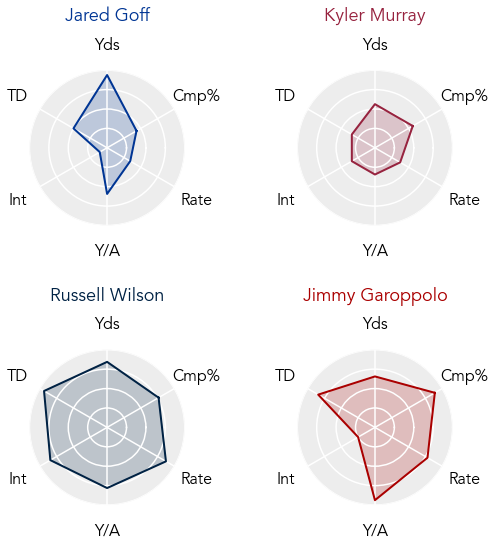

In [25]:
# NFC West
# Create figure
fig = plt.figure(figsize=(8, 8))

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
sf_data = get_qb_data(data_radar_filtered, 'SFO')
sea_data = get_qb_data(data_radar_filtered, 'SEA')
ari_data = get_qb_data(data_radar_filtered, 'ARI')
lar_data = get_qb_data(data_radar_filtered, 'LAR')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, lar_data, team_colors['LAR'])
ax2 = create_radar_chart(ax2, angles, ari_data, team_colors['ARI'])
ax3 = create_radar_chart(ax3, angles, sea_data, team_colors['SEA'])
ax4 = create_radar_chart(ax4, angles, sf_data, team_colors['SFO'])

plt.show()

## MVP Race

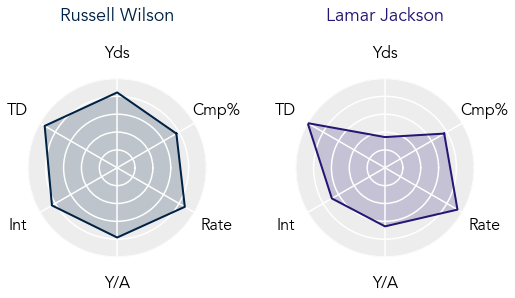

In [28]:
# MVP Race
# Create figure
fig = plt.figure(figsize=(8, 4))

# Add subplots
ax1 = fig.add_subplot(121, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(122, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
bal_data = get_qb_data(data_radar_filtered, 'BAL')
sea_data = get_qb_data(data_radar_filtered, 'SEA')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, sea_data, team_colors['SEA'])
ax2 = create_radar_chart(ax2, angles, bal_data, team_colors['BAL'])

plt.show()

## 1st Round QBs

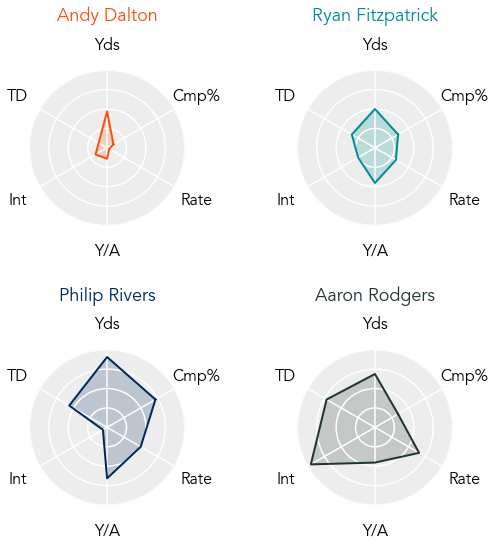

In [32]:
# 1st Round Draft Picks
# Create figure
fig = plt.figure(figsize=(8, 8))

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
cin_data = get_qb_data(data_radar_filtered, 'CIN')
mia_data = get_qb_data(data_radar_filtered, 'MIA')
lac_data = get_qb_data(data_radar_filtered, 'LAC')
gnb_data = get_qb_data(data_radar_filtered, 'GNB')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, cin_data, team_colors['CIN'])
ax2 = create_radar_chart(ax2, angles, mia_data, team_colors['MIA'])
ax3 = create_radar_chart(ax3, angles, lac_data, team_colors['LAC'])
ax4 = create_radar_chart(ax4, angles, gnb_data, team_colors['GNB'])

plt.show()